In [15]:
# utils.py
import numpy as np
import matplotlib.pylab as plt
from scipy.stats import multivariate_normal


# From https://stackoverflow.com/questions/40642061/how-to-set-axis-ticks-in-multiples-of-pi-python-matplotlib

def multiple_formatter(denominator=2, number=np.pi, latex='\pi'):
    def gcd(a, b):
        while b:
            a, b = b, a%b
        return a
    def _multiple_formatter(x, pos):
        den = denominator
        num = int(np.rint(den*x/number)) # np.int deprecated
        com = gcd(num,den)
        (num,den) = (int(num/com),int(den/com))
        if den==1:
            if num==0:
                return r'$0$'
            if num==1:
                return r'$%s$'%latex
            elif num==-1:
                return r'$-%s$'%latex
            else:
                return r'$%s%s$'%(num,latex)
        else:
            if num==1:
                return r'$\frac{%s}{%s}$'%(latex,den)
            elif num==-1:
                return r'$\frac{-%s}{%s}$'%(latex,den)
            else:
                return r'$\frac{%s%s}{%s}$'%(num,latex,den)
    return _multiple_formatter


class Multiple:
    def __init__(self, denominator=2, number=np.pi, latex='\pi'):
        self.denominator = denominator
        self.number = number
        self.latex = latex

    def locator(self):
        return plt.MultipleLocator(self.number / self.denominator)

    def formatter(self):
        return plt.FuncFormatter(multiple_formatter(self.denominator, self.number, self.latex))

# feature_image.py

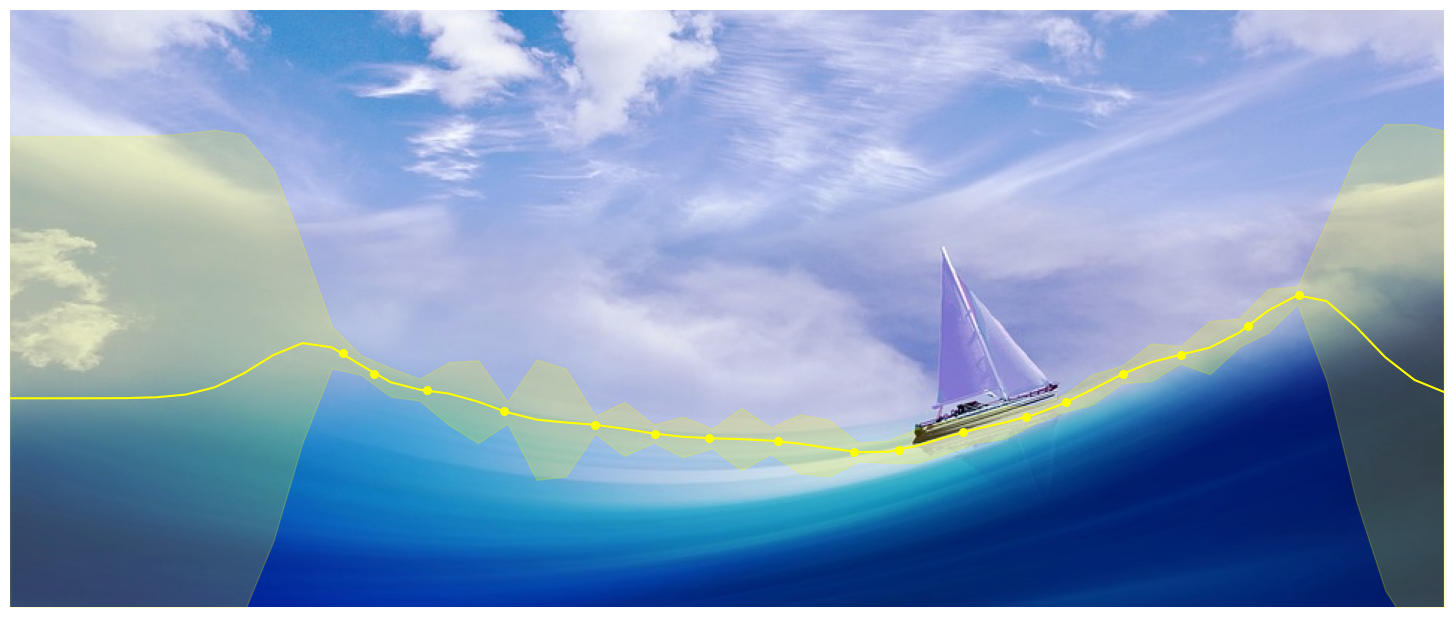

In [34]:
# Code to generate the feature image of the Medium article.
import numpy as np
import matplotlib.pyplot as plt

from gp import GP, SquaredExponentialKernel

# Load the image of the wave.
img = plt.imread("wave.jpg")
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
ax.imshow(img)
x = range(800)

# Data points in the images.
data = [(223, 330),
        (244, 344),
        (279, 355),
        (331, 369),
        (392, 378),
        (432, 384),
        (468, 387),
        (514, 389),
        (565, 396),
        (595, 395),
        (638, 383),
        (680, 373),
        (707, 363),
        (745, 344),
        (784, 331),
        (829, 312),
        (863, 291)]

X = np.array([p[0] for p in data])
Y = np.array([p[1] for p in data])

# Normalize the Y dimension.
mean_Y = np.mean(Y)
std_Y = np.std(Y)
Y = (Y - mean_Y) / std_Y


# Fit a Gaussian Process to the data points.
lengthscale = 40
signal_variance = 3.
noise_variance = 0.1
X_star = np.linspace(0, 960, 50)
kernel = SquaredExponentialKernel(lengthscale=lengthscale, signal_variance=signal_variance)
gp = GP(kernel, noise_variance=noise_variance)
post_m, post_var, weights = gp.posterior(X, Y, X_star)


# Plot results.
color = 'yellow'
ax.plot(X_star, post_m*std_Y + mean_Y, color=color)
ax.scatter(X, Y*std_Y+mean_Y, s=30, color=color)

post_var = np.diagonal(post_var)

plt.fill_between(X_star,
                 (post_m - 1.96 * np.sqrt(post_var)) * std_Y + mean_Y,
                 (post_m + 1.96 * np.sqrt(post_var)) * std_Y + mean_Y,
                 color=color, alpha=0.2)

plt.xlim(0, 960)
plt.ylim(500, 100)
plt.axis('off')
plt.show()


# Linear Kernel Study


In [35]:
#linear_kernel_study.py
import numpy as np


j = 1e-6
for i in range(1, 3):
    jitter = np.eye(i) * j

    X = np.array(list(range(i, 0, -1)))
    X = np.expand_dims(X, axis=1)
    B = np.matmul(X, X.T)

    B = B + jitter

    B_inv = np.linalg.inv(B)

    C = (i+1) * X.T


    C_B_inv = np.matmul(C, B_inv)

    A = np.array([(i+1) * (i+1)])

    sigma = A - np.matmul(C_B_inv, C.T)
    print(i, C_B_inv, sigma)


1 [[1.999998]] [[3.999996e-06]]
2 [[1.19999976 0.59999988]] [[1.80036295e-06]]


# Generate Training Data


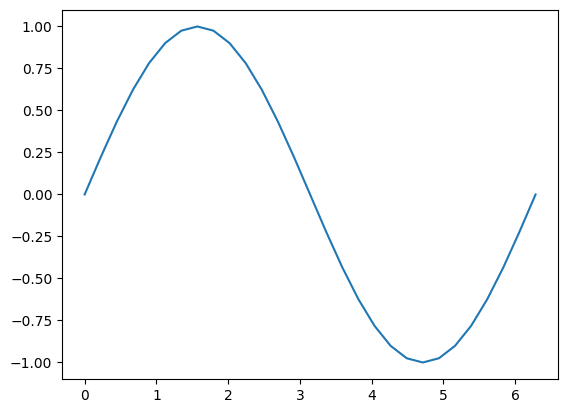

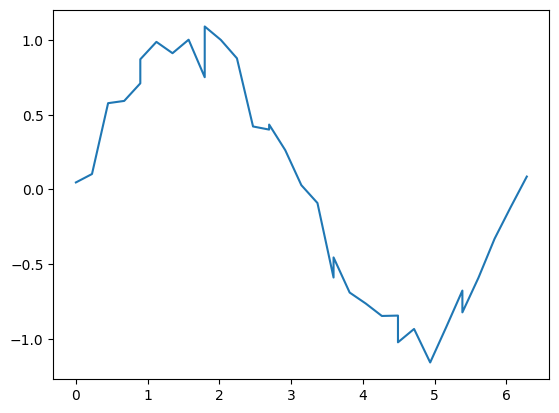

In [36]:
import numpy as np
import matplotlib.pyplot as plt


def generate_points(start, end, section=7, quota=[5, 10], noise=0.1):
    """
    Generate data points from start to end. The data points are generated
    in a number of sections. Odd sections contain the number of points
    given by quota[0]. Even sections contain the number of points given
    by quota[1]. 0-mean Gaussian with variance noise is added into each data point.

    """
    np.random.seed(1234)
    x = []

    section_length = (end - start) / float(section)
    for s in range(section):
        section_start = s * section_length + start
        section_end = (s + 1) * section_length + start

        if s % 2 == 0:
            points = quota[0]
        else:
            points = quota[1]
        x.extend(np.linspace(section_start, section_end, points).tolist())

    x = np.array(x)
    y = np.sin(x) + np.random.normal(scale=noise, size=len(x))

    return x, y


# for noise in [0, 0.1, 0.2, 0.3, 0.4, 0.5, 1, 2, 3, 4, 5]:
for noise in [0,0.1]:
    x, y = generate_points(0, np.pi*2, quota=[5, 5], noise=noise)
    plt.plot(x, y)
    plt.show()


# Constant Kernel Study

In [37]:
import numpy as np


j = 1e-6
for i in range(1, 5):
    jitter = np.eye(i) * j

    B = np.ones((i, i)) + jitter

    B_inv = np.linalg.inv(B)

    C = np.ones((1, i))


    C_B_inv = np.matmul(C, B_inv)

    A = np.array([1])

    sigma = A - np.matmul(C_B_inv, C.T)
    print(i, C_B_inv, sigma)



1 [[0.999999]] [[9.99999e-07]]
2 [[0.49999975 0.49999975]] [[5.00003807e-07]]
3 [[0.33333322 0.33333322 0.33333322]] [[3.33471689e-07]]
4 [[0.24999994 0.24999994 0.24999994 0.24999994]] [[2.50089215e-07]]


# Gaussian Process gp.py

In [38]:
from typing import Tuple
import numpy as np


class Kernel:
    """Abstract kernel class"""
    def covariance(self, X1: float, X2: float) -> float:
        """Return the covariance between location X1 and X2."""
        raise NotImplementedError()


class SquaredExponentialKernel(Kernel):
    def __init__(self, lengthscale: float, signal_variance: float) -> None:
        self.lengthscale = lengthscale
        self.signal_variance = signal_variance

    def covariance(self, X1: float, X2: float) -> float:
        result = np.square(self.signal_variance) * np.exp(-0.5 * np.square((X1 - X2) / self.lengthscale))
        return result


class GP:
    """GP class."""
    def __init__(self, kernel: Kernel, noise_variance: float) -> None:
        self.kernel = kernel
        self.noise_variance = noise_variance

    def k(self, Xs1: np.ndarray, Xs2: np.ndarray) -> np.ndarray:
        """Covariance matrix between locations Xs1 and Xs2. Xs1 and Xs2 are 1D arrays."""
        assert len(list(Xs1.shape)) == 1
        assert len(list(Xs2.shape)) == 1
        result = np.zeros(shape=(Xs1.shape[0], Xs2.shape[0]))
        for row_id, X1 in enumerate(Xs1):
            for col_id, X2 in enumerate(Xs2):
                result[row_id, col_id] = self.kernel.covariance(X1, X2)
        return result

    def posterior(self, X: np.ndarray, Y: np.ndarray,
                  X_star: np.ndarray) -> Tuple[np.ndarray, np.ndarray, np.ndarray]:
        """Return the posterior mean and covariance,
           with the weights used in the posterior mean for plotting."""
        n = len(X)  # Number of training data points.
        n_star = len(X_star) # Number of testing data points.

        assert Y.shape == (n,)

        # Compute k(X, X).
        k_X_X = self.k(X, X)
        assert k_X_X.shape == (n, n)

        # inv is (k(X, X) + Σ)⁻¹.
        inv = self.inv(X)
        assert inv.shape == (n, n)

        # Compute k(X_star, X).
        k_X_star_X = self.k(X_star, X)
        assert k_X_star_X.shape == (n_star, n)
        weights = k_X_star_X

        # Compute k(X_star, X_star).
        k_X_star_X_star = self.k(X_star, X_star)
        assert k_X_star_X_star.shape == (n_star, n_star)

        # Compute posterior mean k(X_star, X) (k(X, X) + Σ)⁻¹ Y.
        mean = np.matmul(np.matmul(k_X_star_X, inv), Y)
        assert mean.shape == (n_star,)

        # Compute posterior covariance:
        # k(X_star, X_star) - k(X_star, X) (k(X, X) + Σ)⁻¹ k(X_star, X)ᵀ
        covariance = k_X_star_X_star - np.matmul(np.matmul(k_X_star_X, inv), k_X_star_X.T)
        assert covariance.shape == (n_star, n_star)

        return mean, covariance, weights

    def inv(self, X: np.ndarray) -> np.ndarray:
        """Return the value of (k(X, X)+Σ)⁻¹."""
        n = len(X)
        sigma = np.eye(len(X)) * np.square(self.noise_variance)
        assert sigma.shape == (n, n)

        result = np.linalg.inv(self.k(X, X) + sigma)
        assert result.shape == (n, n)
        return result

    def data_fit_term(self, X: np.ndarray, Y: np.ndarray) -> np.ndarray:
        """Return value of the data fit term -½ Yᵀ (k(X, X)+Σ)⁻¹ Y"""
        result = - 0.5 * np.matmul(np.matmul(Y.T, self.inv(X)), Y)
        return result

    def model_complexity_term(self, X: np.ndarray) -> np.ndarray:
        """Return value of the model complexity term -½log|k(X, X)+Σ|"""
        k_X_X = self.k(X, X)
        noise_cov = np.eye(len(X)) * np.square(self.noise_variance)
        det = np.linalg.det(k_X_X + noise_cov)
        result = -0.5 * np.log(det)
        return result

    def objective(self, X, Y):
        """Return value of the objective function"""
        return self.data_fit_term(X, Y) + self.model_complexity_term(X)


# Sample from Prior

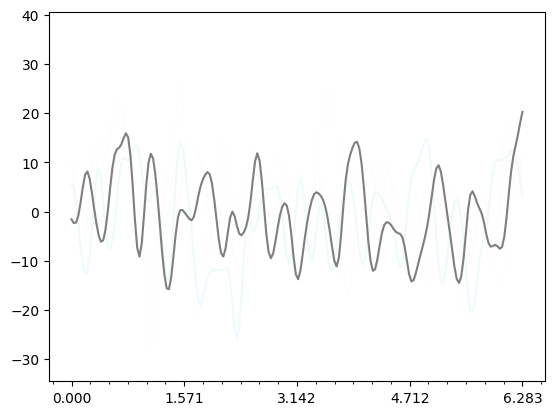

In [39]:
# sample_from_prior.py

from gp import GP, SquaredExponentialKernel
import numpy as np
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
from utils import multiple_formatter

# Set values to model parameters.
lengthscale = 0.1
signal_variance = 10.
noise_variance = 0.1

# Create the GP.
kernel = SquaredExponentialKernel(
    lengthscale=lengthscale, signal_variance=signal_variance)
gp = GP(kernel=kernel, noise_variance=noise_variance)
n = 200
x = np.linspace(0, 2 * np.pi, n)
mean = np.zeros(n)
cov = gp.k(x, x)

# Draw samples from the GP prior.
probabilities = []
samples = []
jitter = np.eye(n) * 1e-6
for _ in range(20):
    y = multivariate_normal.rvs(mean=mean, cov=cov)
    # Add a jitter to the covariance matrix for numerical stability.
    prob = multivariate_normal.pdf(y, mean=mean, cov=cov + jitter)

    samples.append(y)
    probabilities.append(prob)

# Normalize sample probabilities into [0, 1].
probabilities = np.array(probabilities)
min_prob, max_prob = np.min(probabilities), np.max(probabilities)
probabilities = (probabilities - min_prob) / (max_prob - min_prob)

# Plotting.
ax = plt.gca()

for y, prob in zip(samples, probabilities):
    ax.plot(x, y, alpha=prob * 1)
    #ax.plot(x, y, alpha=prob * 2)

ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi / 2))
ax.xaxis.set_minor_locator(plt.MultipleLocator(np.pi / 12))
#ax.xaxis.set_major_formatter(plt.FuncFormatter(multiple_formatter()))

plt.show()


# sample_from_prior_gp.py

In [42]:
from gp import GP, SquaredExponentialKernel
import numpy as np
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt

from kernels import ConstantKernel, LinearKernel, SumKernel, ProductKernel, Matern12, Matern52
from utils import multiple_formatter

import gpflow
import numpy as np
import tensorflow as tf
import matplotlib



# Set values to model parameters.
lengthscale = 1
signal_variance = 1.
noise_variance = 0.1




k = gpflow.kernels.Matern52(input_dim=1)



def plotkernelsample(k, xmin=0, xmax=3):
    xx = np.linspace(xmin, xmax, 300)[:,None]
    K = k.K(xx)
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        cov = sess.run(K)
        plt.plot(xx, np.random.multivariate_normal(np.zeros(300), cov, 5).T)
        plt.set_title('Samples ' + k.__class__.__name__)
        plt.show()


plotkernelsample(k)



ModuleNotFoundError: No module named 'gpflow'

# sample_from_prior_combine.py

In [31]:
from gp import GP, SquaredExponentialKernel
import numpy as np
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt

from kernels import ConstantKernel, LinearKernel, SumKernel, ProductKernel, Matern12, Matern52, \
    PeriodicKernel
from utils import multiple_formatter

# Set values to model parameters.
lengthscale = 1
signal_variance = 1.
noise_variance = 0.01

# Create the GP.
e_kernel = SquaredExponentialKernel(
    lengthscale=lengthscale*2, signal_variance=signal_variance)


c_kernel = ConstantKernel(variance=1)

l_kernel = LinearKernel(variance=1)

p_kernel = PeriodicKernel(
    lengthscale=lengthscale, signal_variance=signal_variance, period=np.pi * 0.25)

e2_kernel = ExponentialSquaredKernel(
    lengthscale=lengthscale * 1000, signal_variance=signal_variance)

m5_kernel = Matern52(lengthscale=lengthscale*10, signal_variance=signal_variance * 10)
m1_kernel = Matern12(lengthscale=lengthscale, signal_variance=signal_variance)


# kernel = SumKernel(m5_kernel, m1_kernel)
# kernel = p_kernel
kernel = m5_kernel

# kernel = m5_kernel
kernel = ProductKernel(m1_kernel, p_kernel)
kernel = SumKernel(m1_kernel, p_kernel)
# kernel = p_kernel
# kernel = ProductKernel(e_kernel, l_kernel)
# kernel = SumKernel(m5_kernel, m1_kernel)
# kernel = l_kernel
# kernel = m5_kernel

kernels = [#SumKernel(m1_kernel, p_kernel),
           ProductKernel(m1_kernel, p_kernel),
           m1_kernel,
           p_kernel]
names = ['Matern1/2 x Periodic', 'Matern1/2', 'Periodic']

colors = ['red', 'blue', 'green']


fig, ax = plt.subplots(3, 1, sharex=True)

for id_, kernel in enumerate(kernels):

    # kernel = e_kernel
    gp = GP(kernel=kernel, noise_variance=noise_variance)
    n = 200
    x = np.linspace(0, 3*np.pi, n)
    # x = np.array([1, 2, 3])
    mean = np.zeros(n)
    cov = gp.k(x, x)

    print(cov)

    # Draw samples from the GP prior.
    probabilities = []
    samples = []
    jitter = np.eye(n) * 1e-3
    for _ in range(1):
        y = multivariate_normal.rvs(mean=mean, cov=cov + jitter)
        # Add a jitter to the covariance matrix for numerical stability.
        prob = multivariate_normal.pdf(y, mean=mean, cov=cov + jitter)

        samples.append(y)
        probabilities.append(prob)

    # Normalize sample probabilities into [0, 1].
    probabilities = np.array(probabilities)
    min_prob, max_prob = np.min(probabilities), np.max(probabilities)
    probabilities = (probabilities - min_prob) / (max_prob - min_prob)

    # Plotting.
    for y, prob in zip(samples, probabilities):
        ax[id_].plot(x, y, alpha=1, color=colors[id_], label=names[id_])
        ax[id_].legend(loc="upper right")
    ax[0].xaxis.set_major_locator(plt.MultipleLocator(np.pi / 2))
    ax[0].xaxis.set_minor_locator(plt.MultipleLocator(np.pi / 12))
    ax[0].xaxis.set_major_formatter(plt.FuncFormatter(multiple_formatter()))


plt.show()


NameError: name 'ExponentialSquaredKernel' is not defined